Identify customers who will not renew their contract 

In [1]:
# Reference for report and code
#https://www.kaggle.com/rankirsh/do-you-feel-the-churn-visualisation-prediction
# reference for code    
#https://www.kaggle.com/pierrejeanne/why-customer-left-and-good-ml-acc-0-83-pre-0-82

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
# display progress bar during iteration
from tqdm.notebook import tqdm

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix

# stat on data
from scipy import stats
from scipy.stats import norm, skew

# slip the data
from sklearn.model_selection import train_test_split
# scale the data
from sklearn.preprocessing import MinMaxScaler
# cross validation
from sklearn.model_selection import cross_val_score
# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# model evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Telecome DataSet Classification

In [3]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [4]:
# LIBRARY FOR EDA
from dataprep.eda import *
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing

NumExpr defaulting to 4 threads.


In [5]:
# load the data
df = pd.read_csv(r'telecom_users.csv')
df.head(10)

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   
5        2215  4312-GVYNH  Female              0     Yes         No      70   
6        5260  2495-KZNFB  Female              0      No         No      33   
7        6001  4367-NHWMM  Female              0      No         No       1   
8        1480  8898-KASCD    Male              0      No         No      39   
9        5137  8016-NCFVO    Male              1      No         No      55   

  PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
0          Yes               Yes              No  ...  No internet service   
1          Yes                No     Fiber optic  ...                  Yes   
2          Yes               Yes     Fiber optic  ...                   No   
3          Yes                No             DSL  ...                   No   
4          Yes                No             DSL  ...                  Yes   
5           No  No phone service             DSL  ...                  Yes   
6          Yes               Yes     Fiber optic  ...                   No   
7           No  No phone service             DSL  ...                   No   
8           No  No phone service             DSL  ...                  Yes   
9          Yes               Yes     Fiber optic  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   
5                  Yes                   No                  Yes   
6                   No                   No                  Yes   
7                   No                   No                   No   
8                  Yes                   No                   No   
9                  Yes                  Yes                  Yes   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   
5        Two year              Yes  Bank transfer (automatic)          49.85   
6  Month-to-month              Yes           Electronic check          90.65   
7  Month-to-month              Yes               Mailed check          24.90   
8        One year               No               Mailed check          35.55   
9  Month-to-month              Yes           Electronic check         116.50   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  
5       3370.2     No  
6       2989.6     No  
7         24.9     No  
8      1309.15     No  
9      6382.55     No  

[10 rows x 22 columns]

In [6]:
# drop 'Unnamed: 0' 
df.drop('Unnamed: 0', inplace=True, axis=1)
# set 'customerID ' as index
df = df.set_index('customerID')
# look at columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null 

In [7]:
# convert TotalCharges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') 

In [8]:
# EDA
pp.ProfileReport(df)

Removing Missing Values

TotalCharges has 10 missing values, we will replace them by the mean.

In [9]:
# find missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
# replace missing value by mean
df['TotalCharges'] = df['TotalCharges'].fillna( df['tenure']*df['MonthlyCharges'] )

Asign dtypes

In [11]:
# senior citizen is concidered as an integer. convert it as object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [12]:
# create list with varaibles object
datatype = df.dtypes
object_variables  = datatype[(datatype == 'object')].index.tolist()
# create list with boolean  varaibles 
bool_variables = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
# create list with categorical variables 
cat_variables = object_variables.copy()
for variable in cat_variables:
    if variable in bool_variables:
        cat_variables.remove(variable)

# convert object dtypes to category
for variable in cat_variables:
    df[variable] = df[variable].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5986 non-null   category
 1   SeniorCitizen     5986 non-null   category
 2   Partner           5986 non-null   object  
 3   Dependents        5986 non-null   category
 4   tenure            5986 non-null   int64   
 5   PhoneService      5986 non-null   object  
 6   MultipleLines     5986 non-null   category
 7   InternetService   5986 non-null   category
 8   OnlineSecurity    5986 non-null   category
 9   OnlineBackup      5986 non-null   category
 10  DeviceProtection  5986 non-null   category
 11  TechSupport       5986 non-null   category
 12  StreamingTV       5986 non-null   category
 13  StreamingMovies   5986 non-null   category
 14  Contract          5986 non-null   category
 15  PaperlessBilling  5986 non-null   object  
 16  PaymentMethod 

Numerical variables

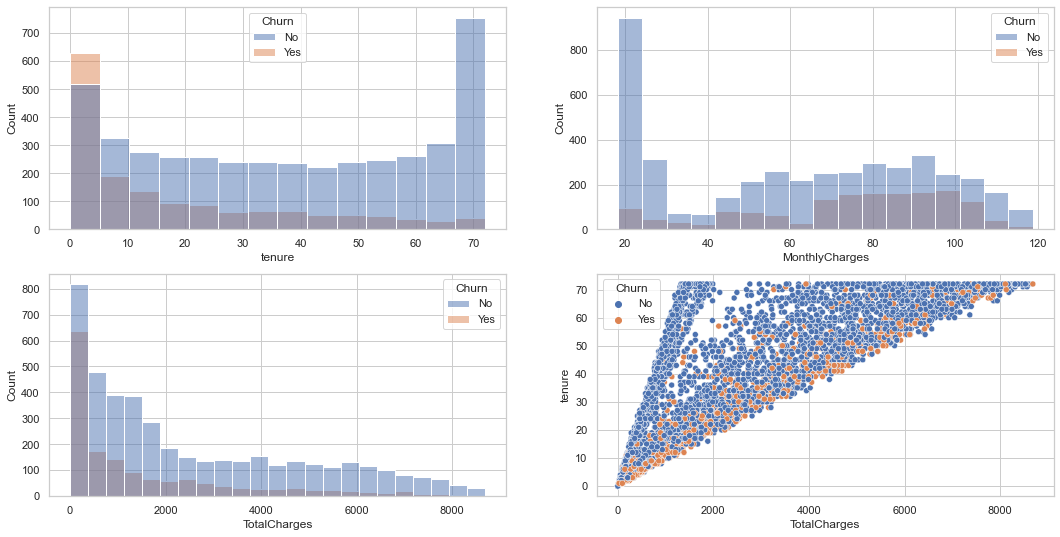

In [13]:
#  plot the correlations between variables and their relations with target varibales
fig, axes = plt.subplots(2,2,figsize=(18,9))
# fig.subplots_adjust(hspace=0.3)
ax0, ax1, ax2, ax3 = axes.flatten() 
sns.histplot(data=df, x="tenure", hue="Churn",ax=ax0)
sns.histplot(data=df, x="MonthlyCharges", hue="Churn",ax=ax1)
sns.histplot(data=df, x="TotalCharges", hue="Churn",ax=ax2)
sns.scatterplot(data=df, x="TotalCharges", y="tenure", hue="Churn",ax=ax3)

plt.show()

We can see that:

in general, clients who want to leave (churn = 'Yes'), are new clients (low tenure <~15 months, and so low TotalCharges) and with high MonthlyCharges > 65$/per month.
there is no linear relation between tenure and TotalCharges, so there are additional fees that need to be calculated.

In [14]:
# add new variable called 'difference':
df['differences'] = df['TotalCharges'] - df['tenure']*df['MonthlyCharges']

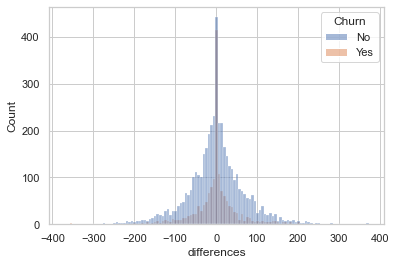

In [15]:
sns.histplot(data=df, x="differences", hue="Churn")
plt.show()

There is no clear relations between extra fees and Churn.

In [16]:
# initiate list to store percentage and name
percentage_churn = []
option_churn = []

for variable in object_variables[:-1]:
    ct = pd.crosstab(df.Churn, df[variable], normalize=True)
    # Among all the data: get max percentage in row 'YES'(client who left)
    val_max = np.max(ct.loc['Yes',:])
    # get which option associated with val_max and add it to the list
    col_name = ct.columns[ct.isin([val_max]).any()][0]
    option_churn.append(col_name)
    # Among all the client who left (26.5%) calculate percentage client who left with this specific option
    perc_val_max = val_max * 100/0.265
    percentage_churn.append(perc_val_max)
    
    
df_cross_tab = pd.DataFrame({'variable':object_variables[:-1],'name':option_churn,'percentage':percentage_churn})
df_cross_tab = df_cross_tab.sort_values('percentage',ascending=False)

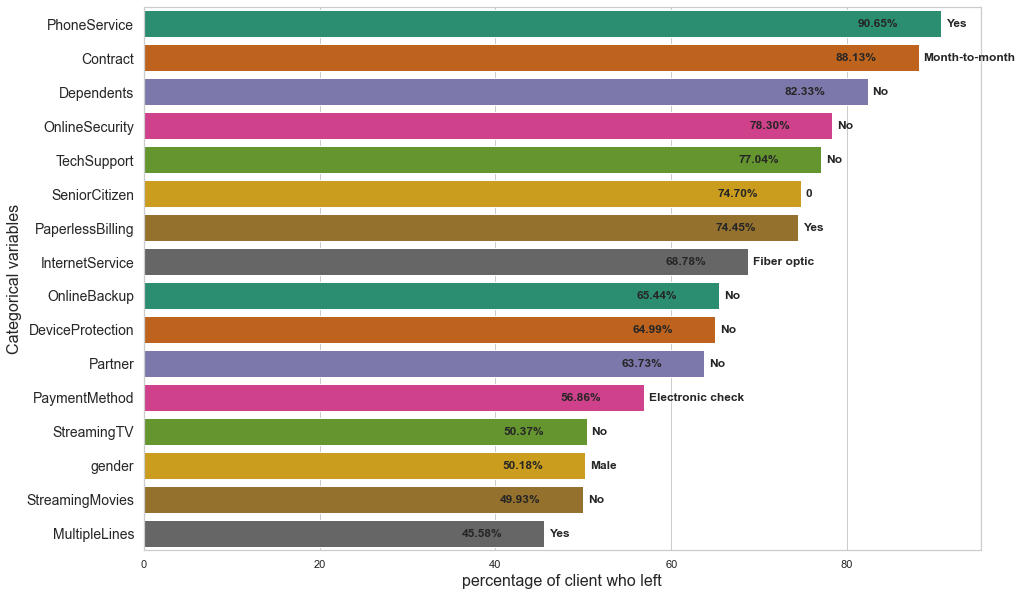

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.barplot(x="percentage", y="variable",data = df_cross_tab,palette= 'Dark2',orient='h')
ax.set_ylabel('Categorical variables',fontsize=16)
ax.set_xlabel('percentage of client who left',fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), size= 14)
# ax.set_xticklabels(ax.get_xticklabels(), size = 14)

list_name = df_cross_tab['name'].tolist()
for p,name in zip(ax.patches,list_name):
    ax.annotate(name, xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center",fontweight = 'bold')
    ax.annotate('{:.2f}%'.format(p.get_width()), xy=(p.get_width()-10, p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center",fontweight = 'bold')

This figure shows that, for the customer who left:

91% had 'phone services'
88% had a 'month-to-month' contract,
82% had no 'dependents',
78% had no 'online security',
77% had no 'tech support',
75% had 'Paperless Billing' and are 'senior citizen`
68% received internet with a fiber optic,
65% had no 'online backup' and no 'device protection',
64% had no partner
57% paid by electronic check,
50% had no 'streaming TV', were male and no 'streaming movies',
45 % had 'multiplelines'

formulation of hypotheses
Based on our observations we can proposed that a client is more susceptible to leave if :

he has a high MonthlyCharges. It is especially true if:
the client is new (low tenure < ~15 months).
and has no special services as: online security, tech support, online backup and/or device protection
if the decision to leave is easy too take, meaning:
no strong commitment: has a month-to-month contract,
no other person involve in the decision: no dependent and/or no partner,
evrything can be done on internet or by phone: has Paperless Billing and phone services

Preprocessing

In [18]:
# drop unwanted columns
df = df.drop(['gender','MultipleLines','PhoneService','differences'],axis=1)

# get dummies
df = pd.get_dummies(df,drop_first = True)

Clustomer who stayed: 4399
Customers who left : 1587


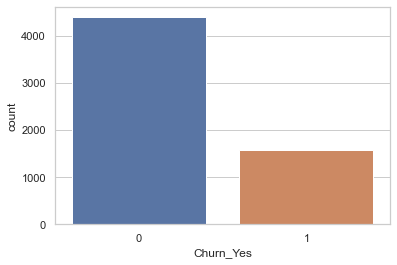

In [19]:
# Displaying the count for non Deviated hole 
majority_class = df.loc[df['Churn_Yes'] == 0].count()[0]

# Showing the count for Deviated hole 
minority_class = df.loc[df['Churn_Yes'] == 1].count()[0]

# Printing the classes for the deviated and non-deviated class 
print('Clustomer who stayed: {}'.format(majority_class))
print('Customers who left : {}'.format(minority_class))


sns.countplot(x="Churn_Yes", data=df)
plt.show()

The target data is imbalanced

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to use SMOTE.

SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [20]:
from imblearn.over_sampling import SMOTE


X = df.drop(['Churn_Yes'],axis = 1)
ysmote = df[['Churn_Yes']].values.ravel()
# Using SMOTE to Balance the imbalanced data 
X_resampled, y_resampled = SMOTE().fit_resample(X, ysmote)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns ) 

Clustomer who stayed: 4399
Customers who left : 4399


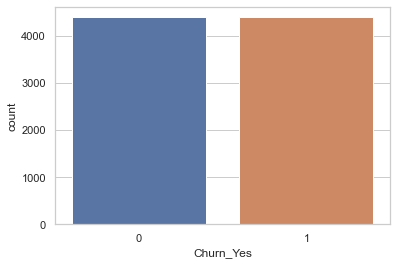

In [21]:
# convert y_resampled to df
df_y_resampled = pd.DataFrame(y_resampled,columns=['Churn_Yes'])

# showing a plot of the Balanced dataset 
majority_class = df_y_resampled.loc[df_y_resampled['Churn_Yes'] == 0].count()[0]

# Showing the count for Non Hole Deviation 
minority_class = df_y_resampled.loc[df_y_resampled['Churn_Yes'] == 1].count()[0]

# Print 
print('Clustomer who stayed: {}'.format(majority_class))
print('Customers who left : {}'.format(minority_class))

sns.countplot(x="Churn_Yes", data=df_y_resampled)
plt.show()

In [22]:
# split the data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = .3, random_state=42)

print('Shape of X_train :'+" "+str(X_train.shape))
print('Shape of X_test :'+" "+str(X_test.shape))

Shape of X_train : (6158, 26)
Shape of X_test : (2640, 26)


Scale the data

Here, we normalize the continuous variables only, leaving the dummy variables alone. We also use the min-max scaler to give those continuous variables the same minimum of zero, max of one, range of 1.

In [23]:
scaler = MinMaxScaler()
numeric_variables  = datatype[(datatype != 'object')].index.tolist()
# fit and transform "x_train"
X_train.loc[:,numeric_variables] = scaler.fit_transform(X_train[numeric_variables])
# transform "x_test"
X_test.loc[:,numeric_variables] = scaler.transform(X_test[numeric_variables])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


 Machine learning for Classification

In [24]:
list_scores = []
def plot_result_cv(list_score_train,list_score_test,model,pred,name):
    print('mean scores on training set: {:2f}, and testing set: {:2f}'.format(np.mean(list_score_train),np.mean(list_score_test)))
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.4,wspace=0.3)
    ax0 = fig.add_subplot(1,2,1)
    ax0 = plt.plot(list_score_train,'go-',label='CV score on training set')
    ax0 = plt.plot(list_score_test,'ro-',label='CV score on testing set')
    ax0 = plt.xlabel('nb of fold cross-validation')
    ax0 = plt.ylabel('score')
    ax0 = plt.legend() 
    
    ax1 = fig.add_subplot(1,2,2)
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,ax=ax1);  
    
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('accuracy: ', accuracy)
    print('recall: ',recall)
    print('precision: ', precision)
    print('f1: ', f1)
    
    list_scores.append({'Model Name': name, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1':f1})
    
    plt.show()

Classification with logistic regression

mean scores on training set: 0.812110, and testing set: 0.806061
accuracy:  0.8079545454545455
recall:  0.851508120649652
precision:  0.777542372881356
f1:  0.8128460686600222


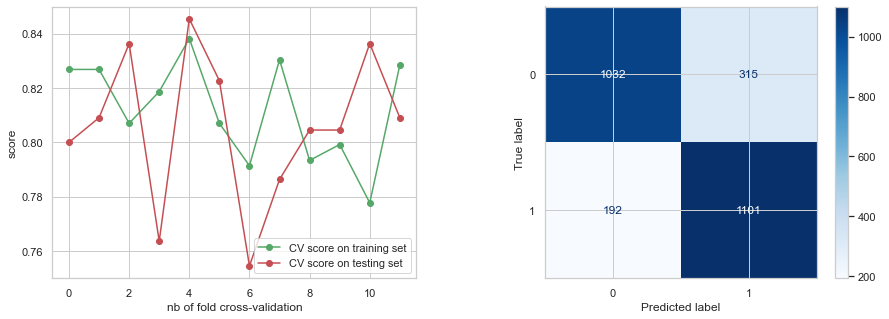

In [25]:
clf_lr = LogisticRegression()

# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_train = cross_val_score(clf_lr,X_train, y_train,cv=12,scoring = 'accuracy')
# Compute accuracy on the testing set with 5-fold cross-validation
cv_scores_test = cross_val_score(clf_lr,X_test, y_test,cv=12,scoring = 'accuracy')

clf_lr_mean_train = np.mean(cv_scores_train)
clf_lr_mean_test = np.mean(cv_scores_test)

clf_lr.fit(X_train,y_train)
pred = clf_lr.predict(X_test)
# plot result cv
plot_result_cv(cv_scores_train,cv_scores_test,clf_lr,pred,'logistic reg')

Classification with k-Nearest Neighbors

In [26]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

{'n_neighbors': 10}

mean scores on training set: 0.813086, and testing set: 0.792045
accuracy:  0.8068181818181818
recall:  0.8522815158546017
precision:  0.7755102040816326
f1:  0.8120854826823876


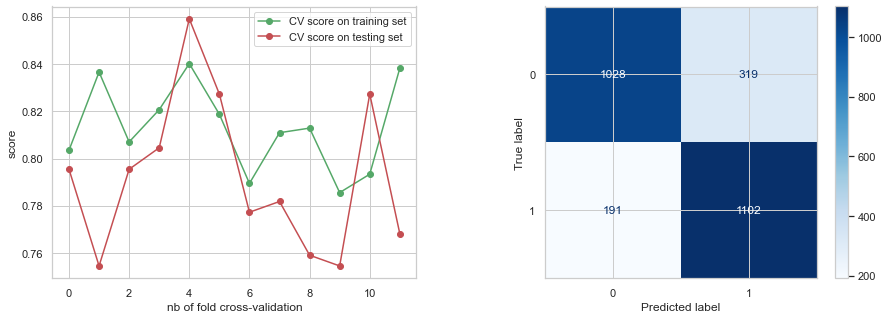

In [27]:
clf_knn = KNeighborsClassifier(n_neighbors=8)

# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_train = cross_val_score(clf_knn,X_train, y_train,cv=12,scoring = 'accuracy')
# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_test = cross_val_score(clf_knn,X_test, y_test,cv=12,scoring = 'accuracy')

clf_knn_mean_train = np.mean(cv_scores_train)
clf_knn_mean_test = np.mean(cv_scores_test)

clf_knn.fit(X_train,y_train)
pred = clf_knn.predict(X_test)
# plot result cv
plot_result_cv(cv_scores_train,cv_scores_test,clf_knn, pred,'knn')

Classification with Support Vector Machines

In [28]:
clf_svm = svm.SVC()

parameters = { 'C':np.arange(1,5,1),'gamma':[0.001, 0.005, 0.01, 0.05, 0.09, 0.1, 0.2, 0.5,1],
               'kernel':['rbf', 'sigmoid', 'linear', 'poly',]}

# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf_svm, param_grid = parameters,cv = 5, n_jobs = -1, verbose = 2,scoring = 'accuracy')

# # Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

Results gridsearch:

Fitting 5 folds for each of 144 candidates, totalling 720 fits

{'C': 4, 'gamma': 0.05, 'kernel': 'rbf'}

mean scores on training set: 0.816983, and testing set: 0.803409
accuracy:  0.8071969696969697
recall:  0.8414539829853055
precision:  0.7816091954022989
f1:  0.8104283054003725


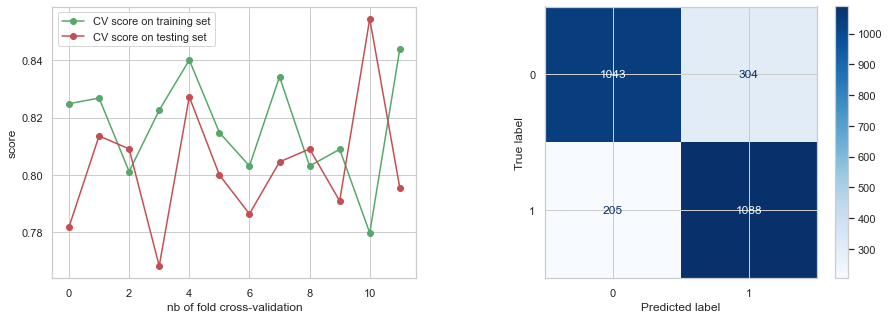

In [29]:
clf_svm = svm.SVC(C= 4, gamma= 0.05,kernel = 'rbf')

# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_train = cross_val_score(clf_svm,X_train, y_train,cv=12)
# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_test = cross_val_score(clf_svm,X_test, y_test,cv=12)

clf_svm_mean_train = np.mean(cv_scores_train)
clf_svm_mean_test = np.mean(cv_scores_test)

clf_svm.fit(X_train,y_train)
pred = clf_svm.predict(X_test)
# plot result cv
plot_result_cv(cv_scores_train,cv_scores_test,clf_svm,pred,'svc')

Result Random search

{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

mean scores on training set: 0.844429, and testing set: 0.815152
accuracy:  0.8352272727272727
recall:  0.8561484918793504
precision:  0.8163716814159292
f1:  0.8357870894677237


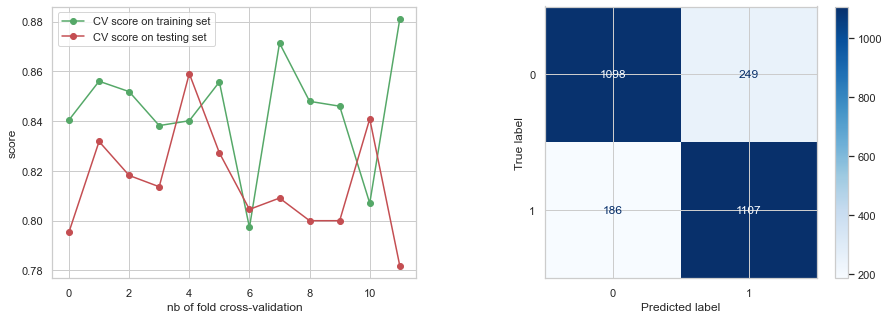

In [30]:
clf_rf = RandomForestClassifier(bootstrap ='True',max_depth = 46,max_features = 'sqrt',
                                min_samples_leaf = 1, min_samples_split = 3, n_estimators = 600)

# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_train = cross_val_score(clf_rf,X_train, y_train,cv=12)
# Compute accuracy on the training set with 5-fold cross-validation
cv_scores_test = cross_val_score(clf_rf,X_test, y_test,cv=12)

clf_rf_mean_train = np.mean(cv_scores_train)
clf_rf_mean_test = np.mean(cv_scores_test)

clf_rf.fit(X_train,y_train)
pred = clf_rf.predict(X_test)
# plot result cv
plot_result_cv(cv_scores_train,cv_scores_test,clf_rf,pred,'rf')

In [31]:
df_scores = pd.DataFrame(list_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 0)